In [ ]:
!pip install ultralytics roboflow tensorboard opencv-python

In [ ]:
from ultralytics import YOLO
import os
#from roboflow import Roboflow

In [ ]:
# Vérifier le GPU
!nvidia-smi



In [ ]:


MODEL = 'yolo11s.pt'   # ou 'yolov11n.pt' pour + rapide
EPOCHS = 60             # 20-30 pour essai, 60-100 pour mieux
IMGSZ = 640             # 960 si avions très petits (plus lent)
BATCH = 16              # ajuste selon la VRAM (baisse si OOM)

model = YOLO(MODEL)

results = model.train(
    data='/content/drive/MyDrive/Colab Notebooks/AircraftDetection.v1i.yolov11/data.yaml',
    epochs=EPOCHS,
    imgsz=IMGSZ,
    batch=BATCH,
    cache=True,      # accélère en recachant les images
    device=0,        # GPU
    project='/content/runs',
    name='yolov11_aircraft',
    exist_ok=True
)


In [12]:
!cp /content/runs/yolov11_aircraft/weights/best.pt "/content/drive/MyDrive/Colab Notebooks/best_aircraft_yolo11s.pt"


In [ ]:
from ultralytics import YOLO
model = YOLO("/content/runs/yolov11_aircraft/weights/best.pt")

# sur quelques images
model.predict(source="/content/drive/MyDrive/Colab Notebooks/AircraftDetection.v1i.yolov11/valid/images", save=True, project="/content/preds", name="val_samples")

# sur une vidéo (chemin local ou URL)
#model.predict(source="/content/test.mp4", save=True, project="/content/preds", name="video_run", vid_stride=1, conf=0.25)



image 1/1 /content/drive/MyDrive/Colab Notebooks/AircraftDetection.v1i.yolov11/test/images/C5-26-_jpg.rf.4488ee5fe7519406f80ac2e492b12a88.jpg: 640x640 1 C5, 15.9ms
Speed: 2.4ms preprocess, 15.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


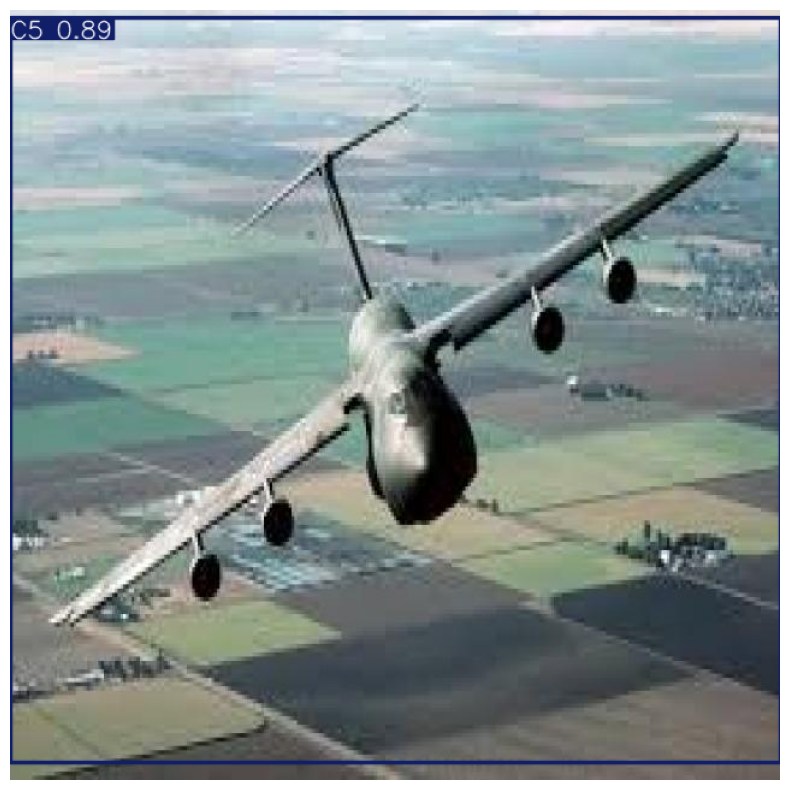

In [20]:
import cv2
from matplotlib import pyplot as plt

# chemin d'une image à tester
image_path = "/content/drive/MyDrive/Colab Notebooks/AircraftDetection.v1i.yolov11/test/images/C5-26-_jpg.rf.4488ee5fe7519406f80ac2e492b12a88.jpg"
# faire une prédiction
results = model.predict(source=image_path, conf=0.35, save=False)  # conf=seuil de confiance

# afficher les résultats dans Colab
res = results[0].plot()  # dessine les boîtes directement sur l'image
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


In [4]:
from ultralytics import YOLO
model = YOLO(r"C:\Users\SOW\Desktop\Projet\Aircraft_detection\best_aircraft_yolo11s.pt")
metrics = model.val(data=r"C:\Users\SOW\Desktop\Projet\Aircraft_detection\Aircraft_Dataset\data.yaml")
print(metrics)

Ultralytics 8.3.221  Python-3.12.3 torch-2.9.0+cpu CPU (Intel Core i5-6300U 2.40GHz)
YOLO11s summary (fused): 100 layers, 9,417,444 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access  (ping: 0.20.2 ms, read: 2.00.9 MB/s, size: 41.8 KB)
val: Scanning C:\Users\SOW\Desktop\Projet\Aircraft_detection\Aircraft_Dataset\valid\labels... 170 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 170/170 79.4it/s 2.1s0.0s
val: New cache created: C:\Users\SOW\Desktop\Projet\Aircraft_detection\Aircraft_Dataset\valid\labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 0.1it/s 1:298.9ss
                   all        170        198      0.807      0.711      0.807      0.594
                   A10         16         17       0.72      0.757      0.678      0.545
                    B1         18         27      0.578      0.407      0.418      0.301
                   B52         16         22      0.628      0.136      0

In [ ]:
precision = 0.807
recall = 0.711
f1 = 2 * (precision * recall) / (precision + recall)
print(f"F1-score: {f1:.3f}")


mAP50 > 0.85	Excellent modèle, détecte bien
mAP50 entre 0.7 et 0.85	Bon modèle, améliorable
mAP50 < 0.6	Trop d’erreurs, revoir dataset ou paramètres
Precision >> Recall	Il “rate” des objets → seuil trop haut
Recall >> Precision	Il détecte trop d’objets faux → seuil trop bas

In [ ]:
!yolo detect val model=best.pt save=True


In [ ]:
!yolo val model=best_aircraft_yolo11s.pt data=data.yaml split=test 
#ou model.val(data="data.yaml", split="test")

In [ ]:
!yolo export model=best_aircraft_yolo11s.pt format=onnx


1️⃣ Entraînement (train)
2️⃣ Validation automatique (val)
3️⃣ Visualisation des résultats (runs/detect/val)
4️⃣ Calcul des métriques : mAP, Precision, Recall, IoU
5️⃣ Analyse des erreurs
6️⃣ Test sur données nouvelles
7️⃣ Export / Déploieme